In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from scipy import stats
import missingno as msno
import plotly.express as px

In [2]:
train=pd.read_csv('train.csv')

In [3]:
train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


#### Cleaning Missing Data

In [5]:
round(train.isnull().sum()/len(train),3)*100

PassengerId     0.0
HomePlanet      2.3
CryoSleep       2.5
Cabin           2.3
Destination     2.1
Age             2.1
VIP             2.3
RoomService     2.1
FoodCourt       2.1
ShoppingMall    2.4
Spa             2.1
VRDeck          2.2
Name            2.3
Transported     0.0
dtype: float64

In [6]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<AxesSubplot:>

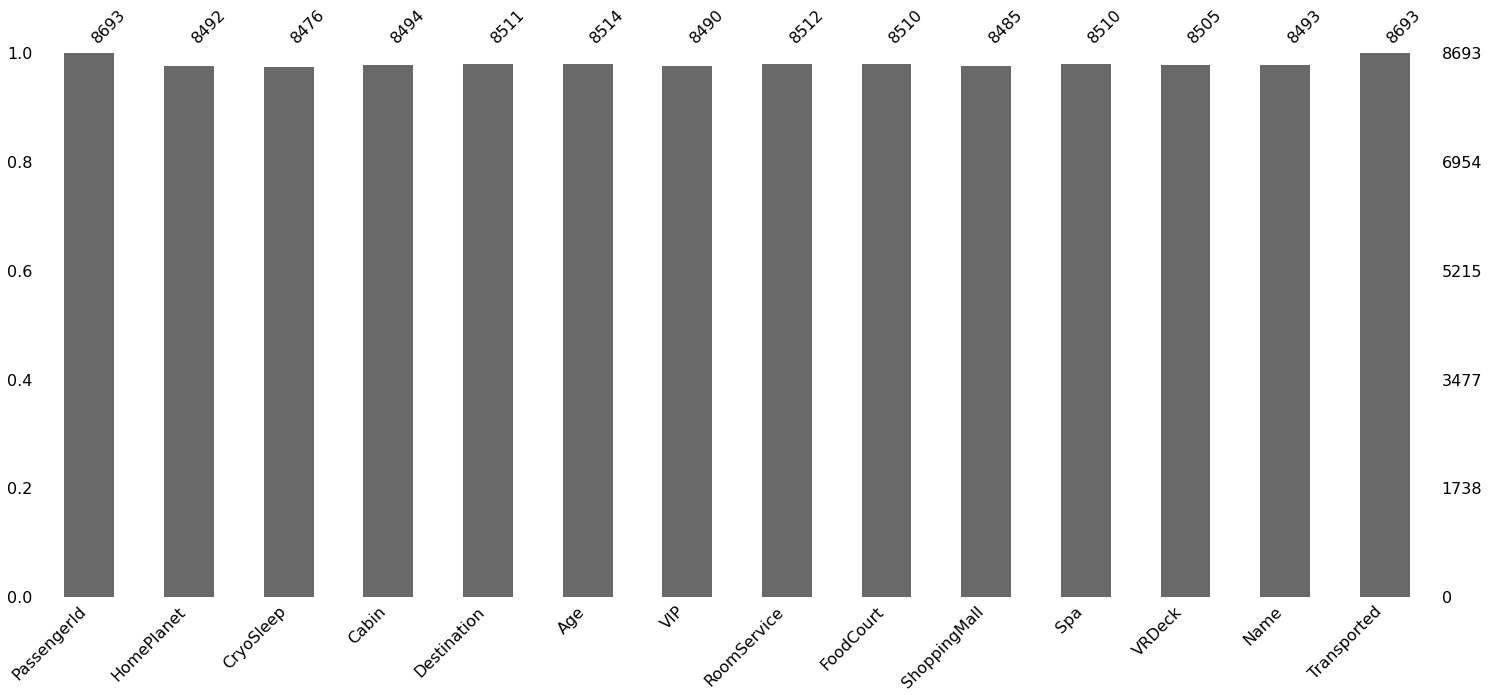

In [7]:
msno.bar(train)

In [8]:
#Plot data types

<AxesSubplot:>

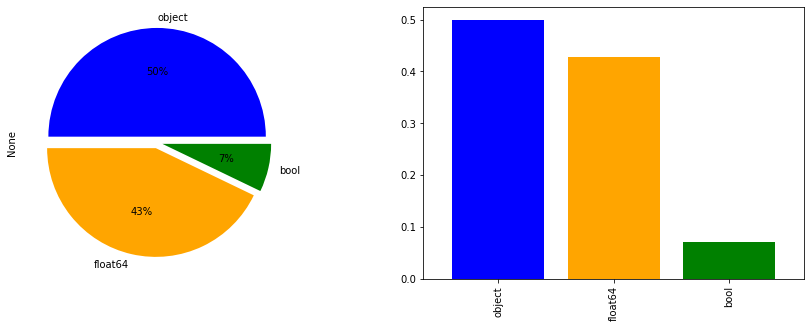

In [9]:
data_types=train.dtypes.value_counts(normalize=True)
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
data_types.plot(kind='pie',colors=['blue', 'orange', 'green'],autopct='%.0f%%',explode=(0.055,0.052,0.05))
plt.subplot(1,2,2)
data_types.plot(kind='bar',color=['blue', 'orange', 'green'],width=0.8,edgecolor=None,figsize=(15,5))

In [10]:
# lets segregate our data into numerical and categorical

In [11]:
num_data=train.select_dtypes(include=['int64','float64'])

In [12]:
num_data.head()

Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
0  39.0          0.0        0.0           0.0     0.0     0.0
1  24.0        109.0        9.0          25.0   549.0    44.0
2  58.0         43.0     3576.0           0.0  6715.0    49.0
3  33.0          0.0     1283.0         371.0  3329.0   193.0
4  16.0        303.0       70.0         151.0   565.0     2.0

In [13]:
num_data.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000

In [14]:
# Lets see Age
num_data[num_data['Age'].isnull()==True]

Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
50    NaN          4.0        0.0           2.0  4683.0     0.0
64    NaN        793.0        0.0           2.0   253.0     0.0
137   NaN          0.0        0.0           0.0     0.0     0.0
181   NaN          0.0     2433.0           NaN   878.0   443.0
184   NaN          2.0     1720.0          12.0  1125.0   122.0
...   ...          ...        ...           ...     ...     ...
8274  NaN          0.0        0.0           0.0     0.0     0.0
8301  NaN          0.0        0.0           0.0     0.0     0.0
8374  NaN        194.0        1.0          10.0   629.0     0.0
8407  NaN          0.0        0.0           0.0     0.0     0.0
8557  NaN          6.0        0.0           0.0   800.0     3.0

[179 rows x 6 columns]

In [15]:
# lets fill all the null value in numerical category by median imputation

In [16]:
for col in num_data.columns:
    num_data[col].fillna(num_data[col].median(),inplace=True)

In [17]:
# Lets visualize them using histogram

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RoomService'}>],
       [<AxesSubplot:title={'center':'FoodCourt'}>,
        <AxesSubplot:title={'center':'ShoppingMall'}>],
       [<AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'VRDeck'}>]], dtype=object)

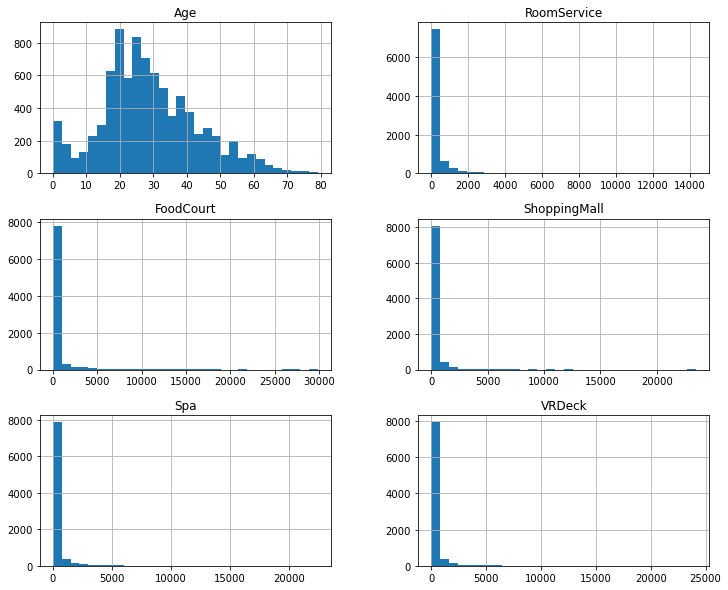

In [18]:
num_data.hist(bins=30,figsize=(12,10))

In [19]:
num_data.isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [20]:
# Now we will deal with categorical null features

In [21]:
categ_data=train.select_dtypes(include=['object','bool'])

In [22]:
categ_data.describe()

PassengerId HomePlanet CryoSleep    Cabin  Destination    VIP  \
count         8693       8492      8476     8494         8511   8490   
unique        8693          3         2     6560            3      2   
top        0001_01      Earth     False  G/734/S  TRAPPIST-1e  False   
freq             1       4602      5439        8         5915   8291   

                  Name Transported  
count             8493        8693  
unique            8473           2  
top     Gollux Reedall        True  
freq                 2        4378

In [23]:
categ_data.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  False   

                Name  Transported  
0    Maham Ofracculy        False  
1       Juanna Vines         True  
2      Altark Susent        False  
3       Solam Susent        False  
4  Willy Santantines         True

In [24]:
categ_data.nunique()

PassengerId    8693
HomePlanet        3
CryoSleep         2
Cabin          6560
Destination       3
VIP               2
Name           8473
Transported       2
dtype: int64

In [25]:
print(categ_data.isnull().sum())
print('Missing value %:',categ_data.isnull().sum().sum()/categ_data.shape[0])

PassengerId      0
HomePlanet     201
CryoSleep      217
Cabin          199
Destination    182
VIP            203
Name           200
Transported      0
dtype: int64
Missing value %: 0.1382721730127689


In [26]:
# Lets chanege variables from True/False to Yes/No

In [27]:
variables=['CryoSleep','VIP','Transported']
for var in variables:
    categ_data[var]=categ_data[var].replace(to_replace=[True, False],value=['Yes','No'])

In [28]:
# Missing value of categorical features train['Cabin'].value_counts()

In [29]:
def fill_proportionality(col,data):
    values=data[col].dropna().unique()
    # getting weights for probability weighting
    weights=data[col].value_counts().values/data[col].value_counts().values.sum()
    # filling
    data[col] = data[col].apply(lambda x: random.choices(values, weights=weights)[0] if pd.isnull(x) else x)

In [30]:
for column in ["Destination", "HomePlanet", "CryoSleep"]:
    fill_proportionality(column,categ_data)

In [31]:
categ_data.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin          199
Destination      0
VIP            203
Name           200
Transported      0
dtype: int64

In [32]:
# Now lets fill the name and Cabin
categ_data['Name'].fillna('Missing',inplace=True)
categ_data['Cabin'].fillna('Missing/M/M',inplace=True)

In [33]:
# VIP is now imputed by mode()
categ_data['VIP'].fillna(categ_data['VIP'].value_counts().index[0],inplace=True)

In [34]:
categ_data.isnull().sum()

PassengerId    0
HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
VIP            0
Name           0
Transported    0
dtype: int64

In [35]:
#finally we managed to handle missing values of numerical and categorical features
#Lets combine these two dataset into single one

In [36]:
data=pd.concat([num_data,categ_data],axis=1,join='inner')

In [37]:
data.tail()

Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck PassengerId  \
8688  41.0          0.0     6819.0           0.0  1643.0    74.0     9276_01   
8689  18.0          0.0        0.0           0.0     0.0     0.0     9278_01   
8690  26.0          0.0        0.0        1872.0     1.0     0.0     9279_01   
8691  32.0          0.0     1049.0           0.0   353.0  3235.0     9280_01   
8692  44.0        126.0     4688.0           0.0     0.0    12.0     9280_02   

     HomePlanet CryoSleep     Cabin    Destination  VIP               Name  \
8688     Europa        No    A/98/P    55 Cancri e  Yes  Gravior Noxnuther   
8689      Earth       Yes  G/1499/S  PSO J318.5-22   No    Kurta Mondalley   
8690      Earth        No  G/1500/S    TRAPPIST-1e   No       Fayey Connon   
8691     Europa        No   E/608/S    55 Cancri e   No   Celeon Hontichre   
8692     Europa        No   E/608/S    TRAPPIST-1e   No   Propsh Hontichre   

     Transported  
8688          No  
8689          No  
8690         Yes  
8691          No  
8692         Yes

#### Univariate Analysis

In [38]:
# Numerical Data

In [39]:
num_data.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8693.000000   8693.000000   8693.000000   8693.000000   8693.000000   
mean     28.790291    220.009318    448.434027    169.572300    304.588865   
std      14.341404    660.519050   1595.790627    598.007164   1125.562559   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      20.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      37.000000     41.000000     61.000000     22.000000     53.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8693.000000  
mean     298.261820  
std     1134.126417  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       40.000000  
max    24133.000000

In [40]:
#The average age of passenger is 29 and the oldest passenger has 79 years. 
#The average Amount the passenger has billed for room service is around 225,and the heighest amount is around 14327. 
#There are somme passengers who hasn't billed any amount.

In [41]:
#We can see a lot of passenger who hasn't paid for anything so lets see about them

In [42]:
no_pay=num_data[((num_data['RoomService']==0)&(num_data['FoodCourt']==0)&(num_data['ShoppingMall']==0)&(num_data['Spa']==0)&(num_data['VRDeck']==0))]

In [43]:
print('Number of passenger who did not pay for any service:',no_pay.shape[0],'and their average age:',round(no_pay['Age'].mean()),'years')


Number of passenger who did not pay for any service: 3653 and their average age: 25 years


In [44]:
# Lets devide age into 4 category
#Teen
#Young
#Adults
#Senior

In [45]:
Age={}
teen_age=num_data[num_data['Age']<=18].shape[0]
Age['Teen']=teen_age,'Teen'
young_age=num_data[(num_data['Age']>18)&(num_data['Age']<=30)].shape[0]
Age['Young']=young_age,'Young'
adult_age=num_data[(num_data['Age']>30)&(num_data['Age']<=60)].shape[0]
Age['Adult']=adult_age,'Adult'
senior_age=num_data[(num_data['Age']>60)].shape[0]
Age['Senior']=senior_age,'Senior'
print('Total number of Teen people in spaceship {}'.format(teen_age))
print('Total number of young people in spaceship {}'.format(young_age))
print('Total number of Adult people in spaceship {}'.format(adult_age))
print('Total number of Senior people in spaceship {}'.format(senior_age))

Total number of Teen people in spaceship 1865
Total number of young people in spaceship 3417
Total number of Adult people in spaceship 3191
Total number of Senior people in spaceship 220


In [46]:
age_list=pd.Series(Age)

In [47]:
feature_list=[]
age_sorted_list=[]
for i in age_list:
    feature_list+=[i[1]]
    age_sorted_list+=[i[0]]

In [48]:
age_sorted_list2=pd.Series(age_sorted_list)

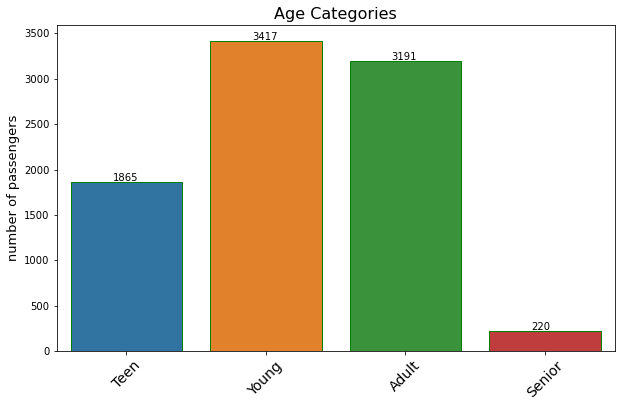

In [49]:
plt.figure(figsize=(10,6))
plt.title("Age Categories", fontsize=16)
plt.ylabel("number of passengers", fontsize=13)
plt.xticks([0,1,2,3],['Teen','Young','Adult','Old'],fontsize=14,rotation=45)
sns.barplot(x=feature_list,y=age_sorted_list,edgecolor='green')
plt.text(x=-0.1,y=age_sorted_list2[0]+7,s="{}".format(age_sorted_list2[0]))
plt.text(x=0.9,y=age_sorted_list2[1]+7,s="{}".format(age_sorted_list2[1]))
plt.text(x=1.9,y=age_sorted_list2[2]+9,s="{}".format(age_sorted_list2[2]))
plt.text(x=2.9,y=age_sorted_list2[3]+11,s="{}".format(age_sorted_list2[3]))
plt.show()

In [50]:
# lets see the distribution plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

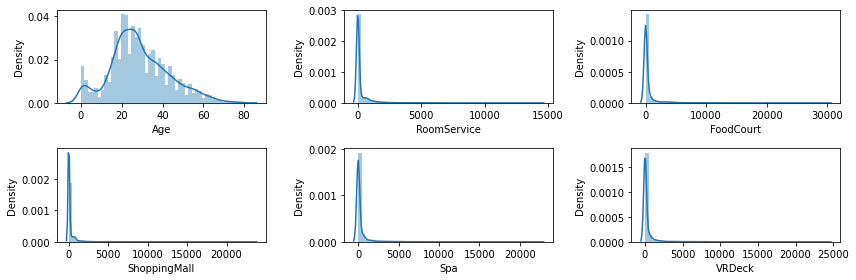

In [51]:
fig=plt.figure(figsize=(12,4))
for i,col in enumerate(num_data):
    ax=fig.add_subplot(2,3,i+1)
    sns.distplot(num_data[col])
fig.tight_layout()
plt.show()

In [52]:
#from the abhove distribution plot we can see that most of the categorical features other than Age are highly concerntrated 
#at the near zero

In [53]:
#Lets check the skewness

In [54]:
skew=num_data.skew(skipna=True).sort_values(ascending=False)
skew

ShoppingMall    12.763842
VRDeck           7.904554
Spa              7.716450
FoodCourt        7.177515
RoomService      6.397766
Age              0.431102
dtype: float64

In [55]:
# we can see that all numerical features are positively right skewed

#### Categorical Data

In [56]:
#Print summary of categorical columns in training dataset
categ_data.describe()

PassengerId HomePlanet CryoSleep        Cabin  Destination   VIP  \
count         8693       8693      8693         8693         8693  8693   
unique        8693          3         2         6561            3     2   
top        0001_01      Earth        No  Missing/M/M  TRAPPIST-1e    No   
freq             1       4660      5582          199         6046  8494   

           Name Transported  
count      8693        8693  
unique     8474           2  
top     Missing         Yes  
freq        200        4378

In [57]:
#By looking at abhove table we can make following conclusion
#Most of the passenger are from earth 
#Some of the cabin and Name records are missing
#Cabin has 6561 unique value so we can't directly use them.

In [58]:
#print categories of each categorical column
for col in categ_data:
    print(f'{col:-<30},{categ_data[col].unique()}')

PassengerId-------------------,['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
HomePlanet--------------------,['Europa' 'Earth' 'Mars']
CryoSleep---------------------,['No' 'Yes']
Cabin-------------------------,['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Destination-------------------,['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
VIP---------------------------,['No' 'Yes']
Name--------------------------,['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre']
Transported-------------------,['No' 'Yes']


In [59]:
categ_data['Cabin'].unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [60]:
#there are many unique value in the Cabin so we have to categorise based on deck, side and id

In [61]:
# Creating new features for training dataset
#Cabin has three values deck/num/side, so we'll create two columns for deck and side
categ_data['deck']=categ_data['Cabin'].apply(lambda x:str(x).split('/')[0])
categ_data['side']=categ_data['Cabin'].apply(lambda x:str(x).split('/')[2])

In [62]:
#Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their 
# number within the group, so we'll create two new features GroupId and GroupIdNumber
categ_data['group_id']=categ_data['PassengerId'].apply(lambda x: str(x).split('_')[0])
#here str(x).split and x.split both valid we can apply both of them
categ_data['group_id_number']=categ_data['PassengerId'].apply(lambda x: x.split('_')[1])

In [63]:
categ_data

PassengerId HomePlanet CryoSleep     Cabin    Destination  VIP  \
0        0001_01     Europa        No     B/0/P    TRAPPIST-1e   No   
1        0002_01      Earth        No     F/0/S    TRAPPIST-1e   No   
2        0003_01     Europa        No     A/0/S    TRAPPIST-1e  Yes   
3        0003_02     Europa        No     A/0/S    TRAPPIST-1e   No   
4        0004_01      Earth        No     F/1/S    TRAPPIST-1e   No   
...          ...        ...       ...       ...            ...  ...   
8688     9276_01     Europa        No    A/98/P    55 Cancri e  Yes   
8689     9278_01      Earth       Yes  G/1499/S  PSO J318.5-22   No   
8690     9279_01      Earth        No  G/1500/S    TRAPPIST-1e   No   
8691     9280_01     Europa        No   E/608/S    55 Cancri e   No   
8692     9280_02     Europa        No   E/608/S    TRAPPIST-1e   No   

                   Name Transported deck side group_id group_id_number  
0       Maham Ofracculy          No    B    P     0001              01  
1          Juanna Vines         Yes    F    S     0002              01  
2         Altark Susent          No    A    S     0003              01  
3          Solam Susent          No    A    S     0003              02  
4     Willy Santantines         Yes    F    S     0004              01  
...                 ...         ...  ...  ...      ...             ...  
8688  Gravior Noxnuther          No    A    P     9276              01  
8689    Kurta Mondalley          No    G    S     9278              01  
8690       Fayey Connon         Yes    G    S     9279              01  
8691   Celeon Hontichre          No    E    S     9280              01  
8692   Propsh Hontichre         Yes    E    S     9280              02  

[8693 rows x 12 columns]

In [64]:
# Creating new feature InGroup to indicate if a passenger is alone or in group
group=categ_data[categ_data['group_id'].duplicated()]['group_id']
categ_data['InGroup']=categ_data['group_id'].apply(lambda x: x in group.values)

In [65]:
# Now we don't need 'PassengerId','Cabin','Name','GroupId','GroupIdNumber' so I am going to drop it

In [66]:
categ_data=categ_data.drop(['PassengerId','Cabin','Name','group_id','group_id_number'],axis=1)
categ_data['InGroup']=categ_data['InGroup'].replace(to_replace=[True,False],value=('Yes','No'))
categ_data.head()

HomePlanet CryoSleep  Destination  VIP Transported deck side InGroup
0     Europa        No  TRAPPIST-1e   No          No    B    P      No
1      Earth        No  TRAPPIST-1e   No         Yes    F    S      No
2     Europa        No  TRAPPIST-1e  Yes          No    A    S     Yes
3     Europa        No  TRAPPIST-1e   No          No    A    S     Yes
4      Earth        No  TRAPPIST-1e   No         Yes    F    S      No

In [67]:
# Now lets see again dataset after removing the unnecessary data
for col in categ_data:
    print(f'{col:-<30},{categ_data[col].unique()}')

HomePlanet--------------------,['Europa' 'Earth' 'Mars']
CryoSleep---------------------,['No' 'Yes']
Destination-------------------,['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
VIP---------------------------,['No' 'Yes']
Transported-------------------,['No' 'Yes']
deck--------------------------,['B' 'F' 'A' 'G' 'Missing' 'E' 'D' 'C' 'T']
side--------------------------,['P' 'S' 'M']
InGroup-----------------------,['No' 'Yes']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

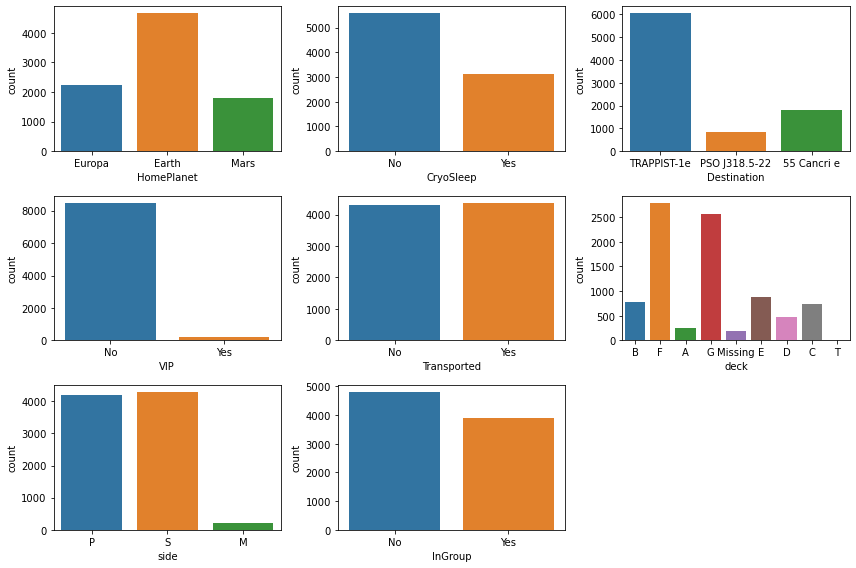

In [68]:
# Now we can plot our data in countplot to visualize
fig=plt.figure(figsize=(12,8))
for i,col in enumerate(categ_data):
    ax=fig.add_subplot(3,3,i+1)
    sns.countplot(categ_data[col])
fig.tight_layout()
plt.show()


In [69]:
#Here we can see that most of the passenger are from earth
#There are more passenger who are not in cryo
#Most passenger destination is trappist-1e
#only little passenger are vip
# Transported passenger are not that difference
#Most passenger are from F and G deck
# Most of the passenger are from side S and P
# there are more solo passenger than in group

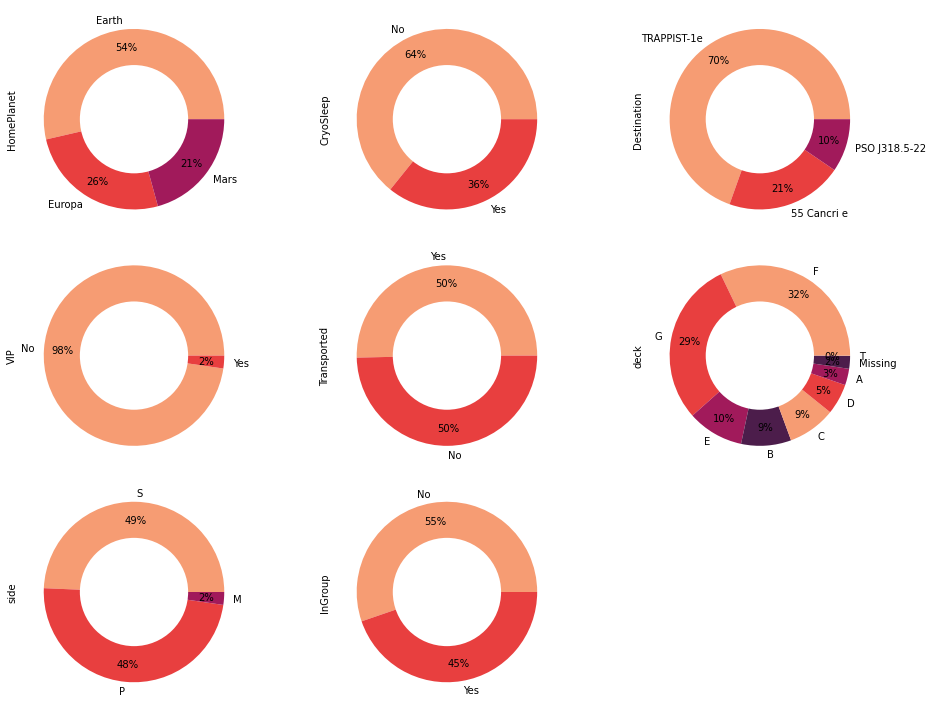

In [70]:
# Lets plot donut chart for each categorical column
fig=plt.figure(figsize=(14,10))
for i, col in enumerate(categ_data):
    ax=fig.add_subplot(3,3,i+1)
    categ_data[col].value_counts().plot(kind='pie',autopct='%.0f%%',pctdistance=0.8,colors=sns.color_palette("rocket_r", 4))
    #lets plot cirlce inside pie
    centre_circle = plt.Circle((0, 0), 0.60, fc='white')
    fig1 = plt.gcf()
    # Adding Circle in Pie chart
    fig1.gca().add_artist(centre_circle)
fig.tight_layout()
plt.show()

#### Bivariate Analysis

Numerical-Numerical Analysis

In [71]:
#At first lets see how numerical features are related with each other

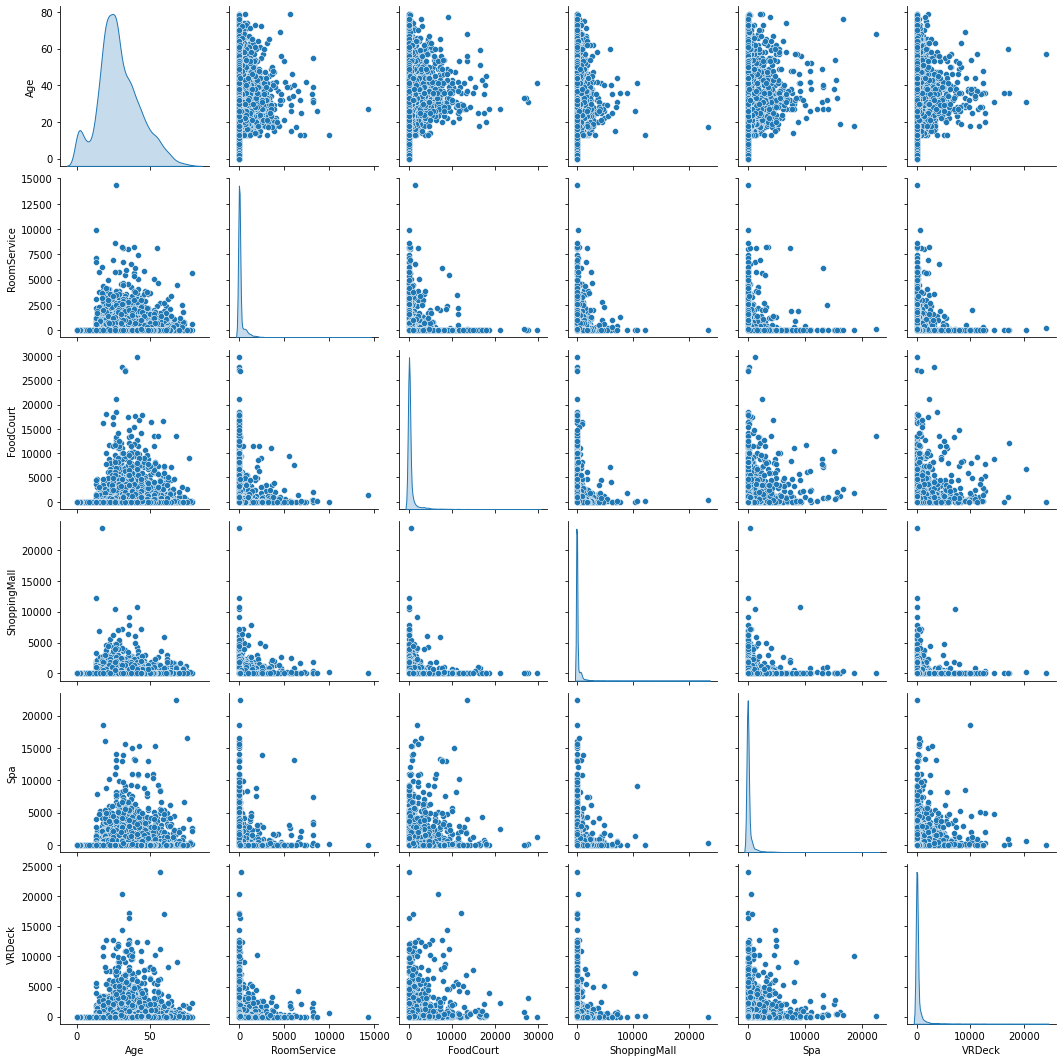

In [72]:
#pairplot
sns.pairplot(num_data,diag_kind='kde')

In [73]:
#Lets plot correlation plot see the relationship between each num_data

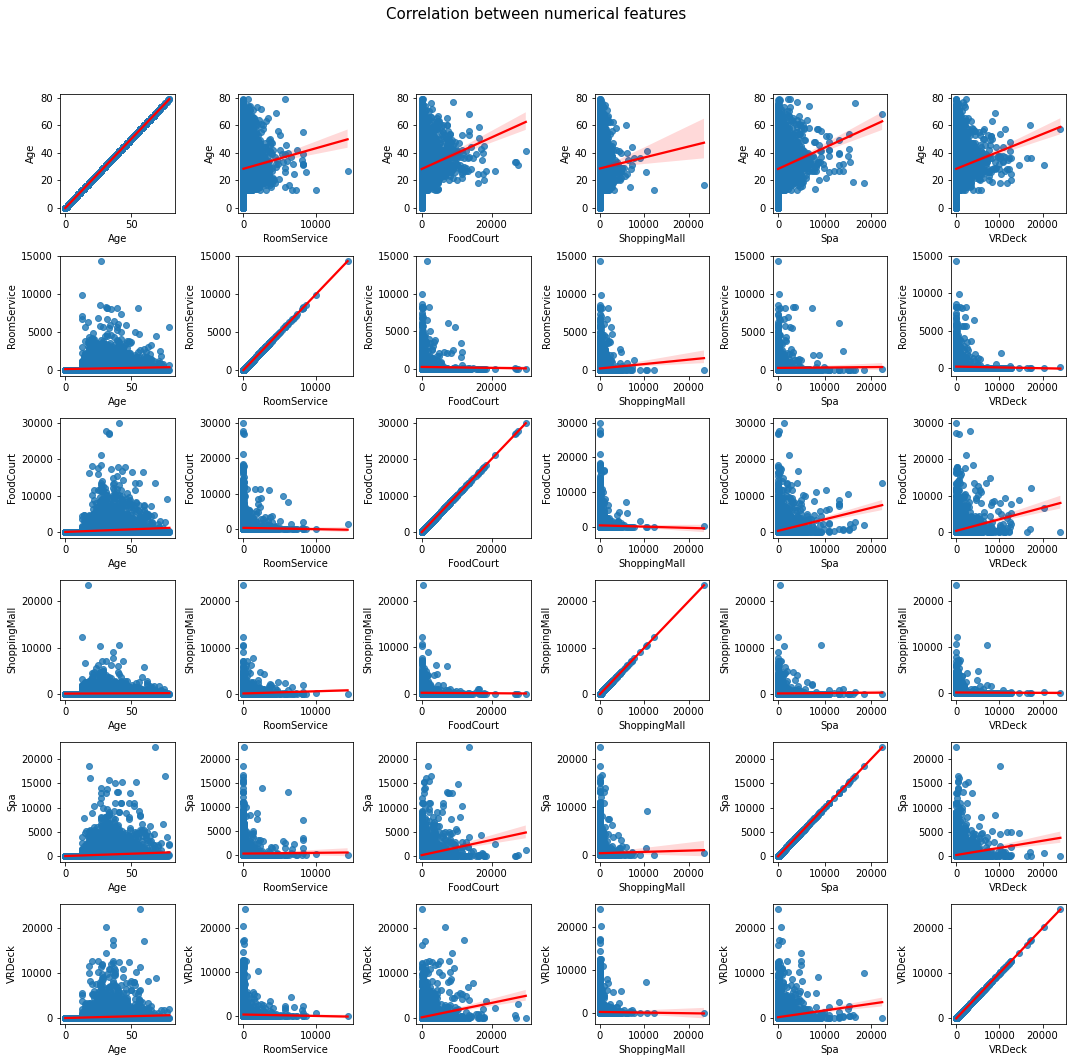

In [74]:
fig,ax=plt.subplots(6,6,figsize=(15,15))
fig.suptitle('Correlation between numerical features',fontsize=15)
for i,col1 in enumerate(num_data):
    for j,col2 in enumerate(num_data):
        sns.regplot(x=col2,y=col1,data=num_data,line_kws={"color": "red"},ax=ax[i,j])
fig.tight_layout()
plt.subplots_adjust(top=0.90)

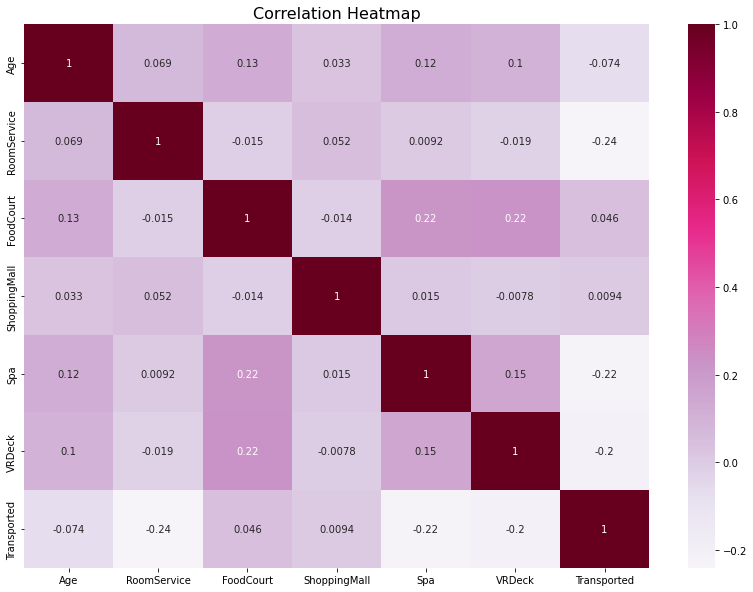

In [75]:
plt.figure(figsize=(14,10))
sns.heatmap(train.corr(),cmap='PuRd',annot=True)
plt.title("Correlation Heatmap",fontsize=16)
plt.show()

In [76]:
#It seems that numericals features are not strongly correlated

Numerical-Categorical Analysis

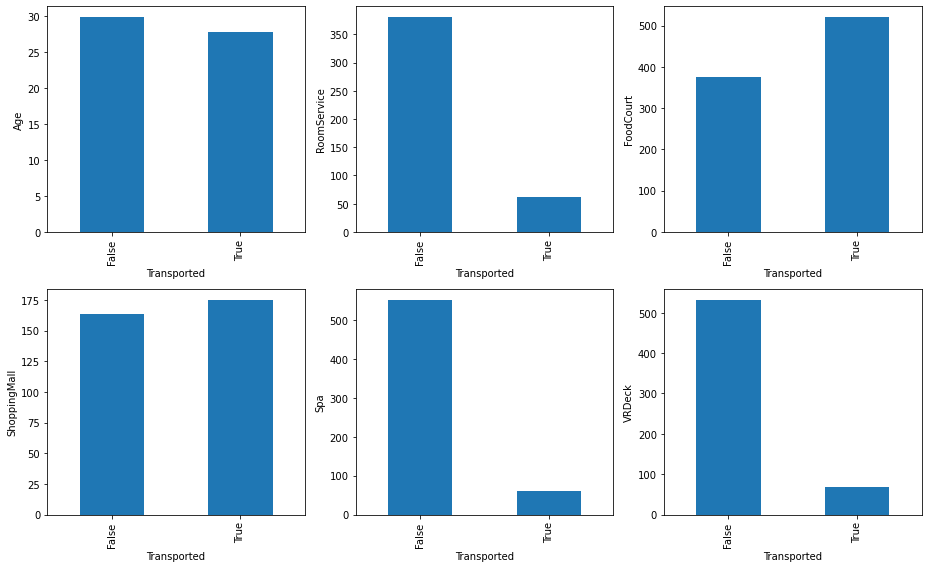

In [77]:
fig=plt.figure(figsize=(13,8))
for i,col in enumerate(num_data):
    ax=fig.add_subplot(2,3,i+1)
    train.groupby(['Transported'])[col].mean().plot(kind='bar')
    ax.set_ylabel(col)
fig.tight_layout()
plt.show()

In [78]:
# from abhove barchart we can see that people who spent more on Room service Spa, VRDeck are not transported 
# where as people who spent more on foodcourt, shopingmall are transported

In [79]:
transported=train[train['Transported']==True]
not_transported=train[train['Transported']==False]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

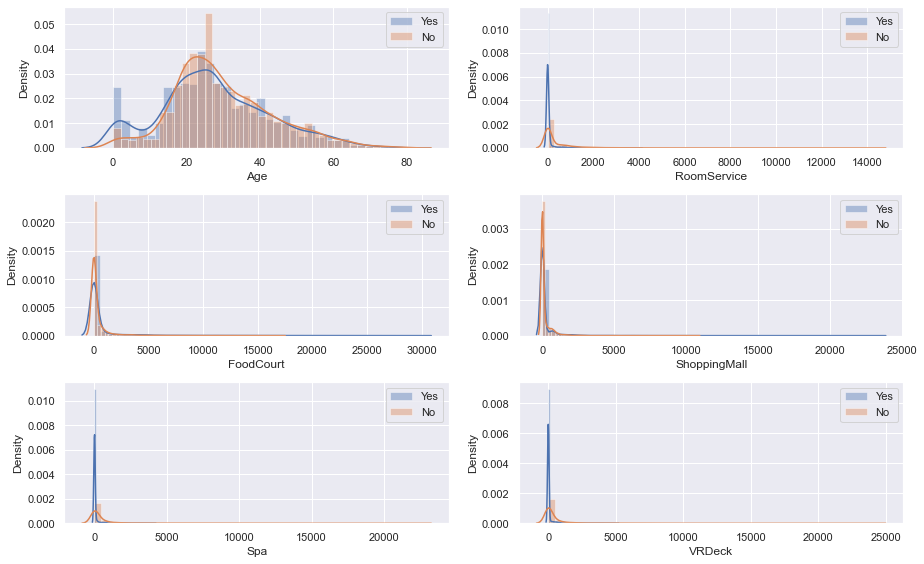

In [80]:
sns.set()
fig = plt.figure(figsize= (13,8))
for i, col in enumerate(num_data):
    
    ax=fig.add_subplot( 3, 2, i+1)
    
    sns.distplot(transported[col],label='Yes')
    sns.distplot(not_transported[col],label='No')
    plt.legend()
    
fig.tight_layout()  
plt.show()

In [81]:
# from these distribution plot we can see that transported or not transported seems different
# so these features affect the chance of transported

In [82]:
data=pd.concat([num_data,categ_data],axis=1,join='inner')

In [83]:
# Now lets see numerical features in more detail using px.bar

In [84]:
columns=[col for col in categ_data if col!='Transported']

In [85]:
for col in columns:
    df_people = data.groupby([ "Transported",col])["RoomService"]
    df_people= df_people.sum().reset_index()
    bar=px.bar(df_people,x=col,y='RoomService',color='Transported',barmode='stack',text='RoomService')
    bar.show()

Categorical-Categorical Analysis

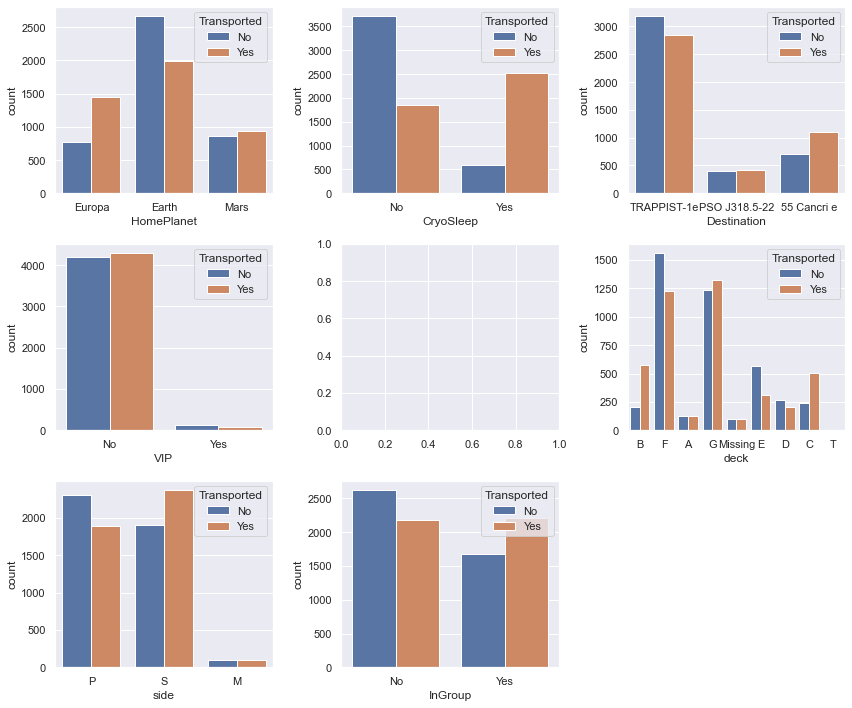

In [86]:
fig=plt.figure(figsize=(12,10))
for i,col in enumerate(categ_data):
    ax=fig.add_subplot(3,3,i+1)
    if col!='Transported':
        sns.countplot(data=categ_data,x=col,hue='Transported')
        ax.set_xlabel(col)
fig.tight_layout()
plt.show()

In [87]:
# from above countplot we can see that passenger from europa and mars get transported more than the earth
#People who are in cryosleep get transferd more than the people who are not in cryo
#People who are not in Vip get transfered most
# Deck G people get transferd more than others
#Side S people relatively transfered most.
#people who are in group get transfered more.

Managing Outliers

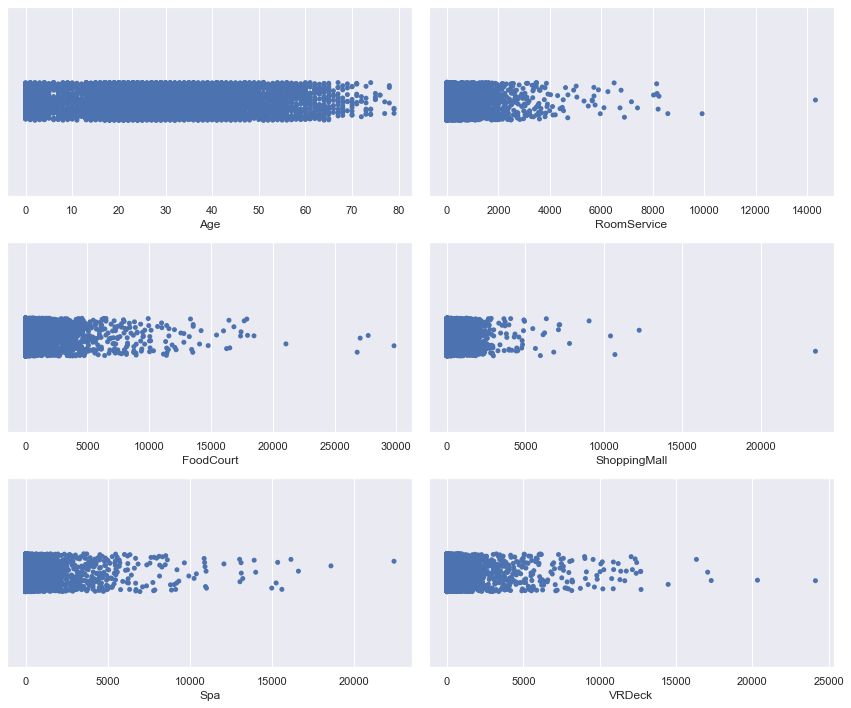

In [88]:
fig=plt.figure(figsize=(12,10))
for i, col in enumerate(num_data):
    ax=fig.add_subplot(3,2,i+1)
    sns.stripplot(x=train[col],ax=ax)
fig.tight_layout()  

In [89]:
# Lets see on boxenplot

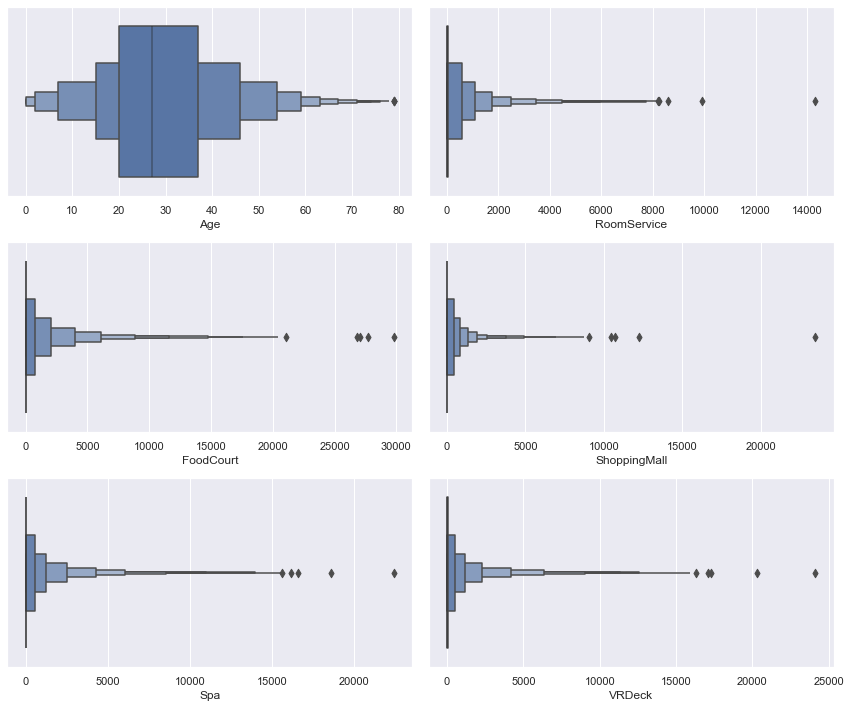

In [90]:
fig=plt.figure(figsize=(12,10))
for i, col in enumerate(num_data):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxenplot(x=train[col],ax=ax)
fig.tight_layout()  

In [91]:
def outlier_visualization(var_out,var_no_out):
    fig,ax=plt.subplots(1, 4,figsize=(15,4))
    sns.distplot(var_out,ax=ax[0])
    sns.stripplot(var_out,ax=ax[1])
    sns.boxenplot(var_out,ax=ax[2])
    stats.probplot(var_out, plot=ax[3])
    plt.suptitle('Data with outliers',fontsize=12)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.8, 
                    wspace=0.4, 
                    hspace=0.4)
    fig.tight_layout()
    plt.show()
    
    #for data without outlierss
    
    fig,ax=plt.subplots(1, 4,figsize=(15,4))
    sns.distplot(var_no_out,ax=ax[0])
    sns.stripplot(var_no_out,ax=ax[1])
    sns.boxenplot(var_no_out,ax=ax[2])
    stats.probplot(var_no_out, plot=ax[3])
    plt.suptitle('Data with outliers',fontsize=12)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.8, 
                    wspace=0.4, 
                    hspace=0.4)
    fig.tight_layout()
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



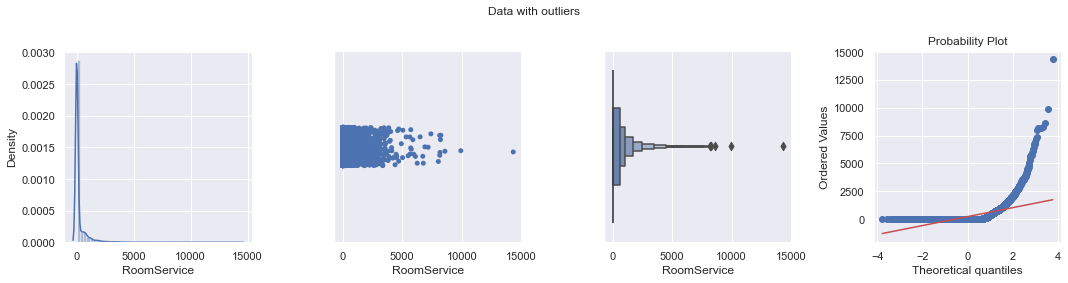

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



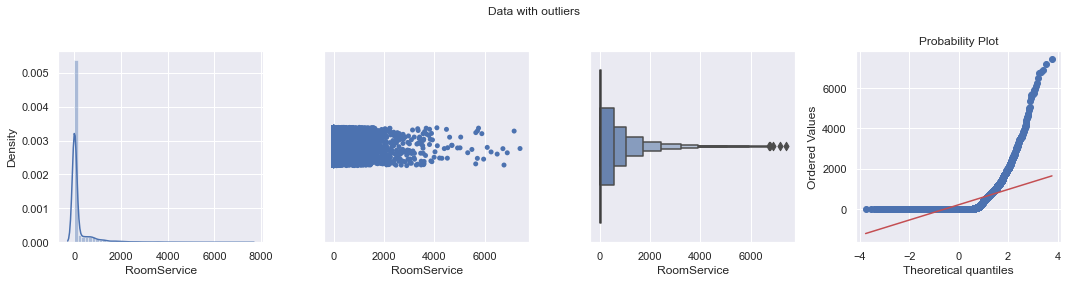

In [92]:
#Roomservice
df=num_data.copy()
df=df[(df['RoomService']<7500)]
outlier_visualization(num_data['RoomService'],df['RoomService'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



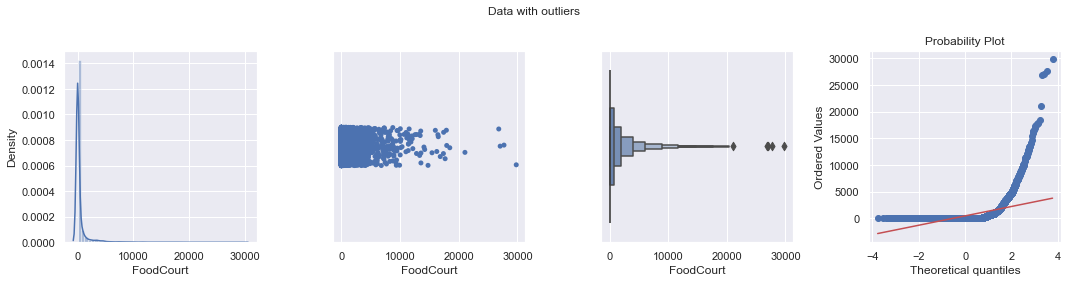

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



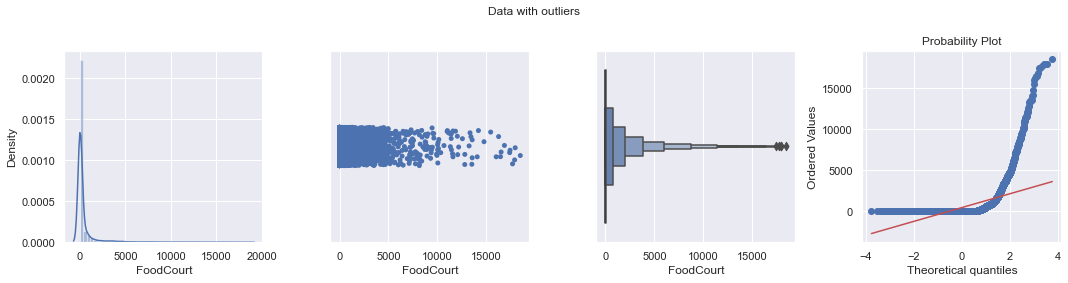

In [93]:
#FoodCourt
df=df[(df['FoodCourt']<20000)]
outlier_visualization(num_data['FoodCourt'],df['FoodCourt'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



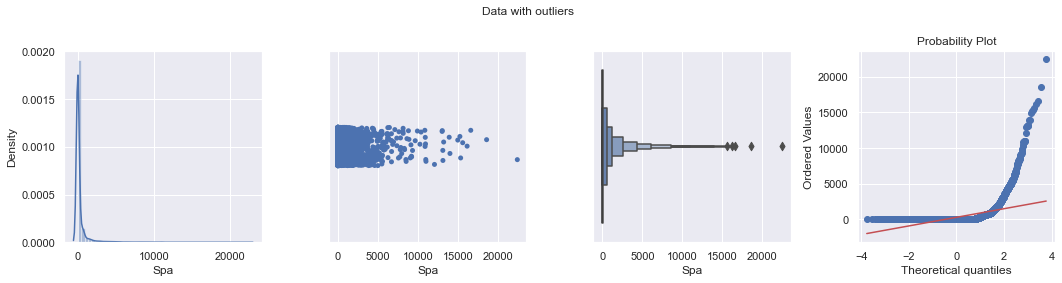

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



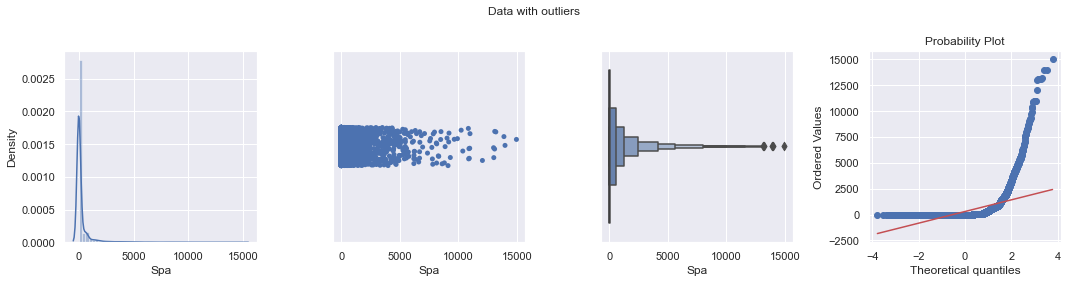

In [94]:
#Remove some outliers from "Spa"
df=df[(df['Spa']<15000)]
outlier_visualization(num_data['Spa'],df['Spa'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



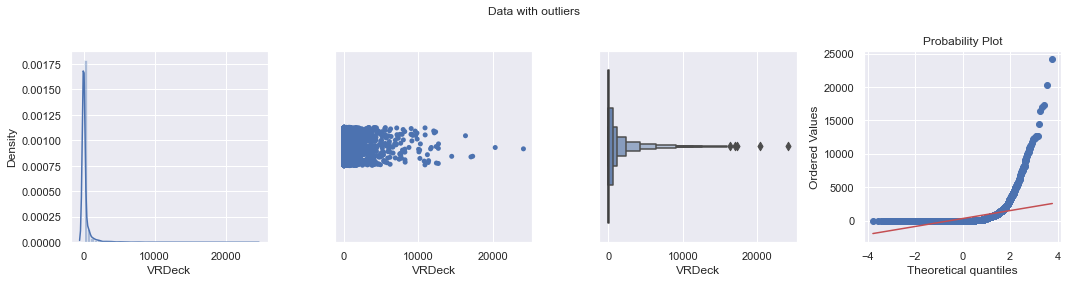

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



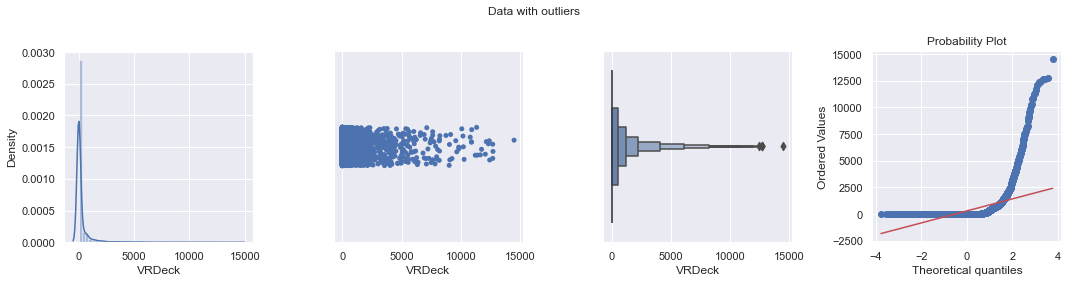

In [95]:
#Remove some outliers from "VRDeck"
df=df[(df['VRDeck']<15000)]
outlier_visualization(num_data['VRDeck'],df['VRDeck'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



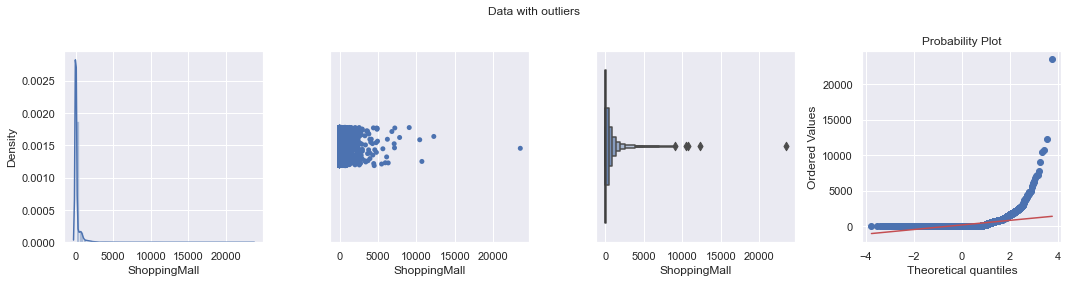

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



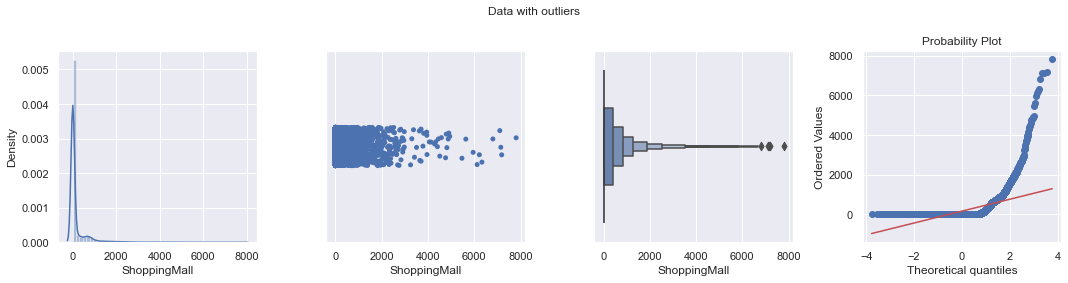

In [96]:
#Remove some outliers from "VRDeck"
df=df[(df['ShoppingMall']<8000)]
outlier_visualization(num_data['ShoppingMall'],df['ShoppingMall'])

In [97]:
# Now lets check how much ouliers did we delete
df=df.reset_index(drop=True)

In [98]:
print('shape of df_train befor removing outliers:',num_data.shape)
print('shape of df_test after removing outliers:',df.shape)

shape of df_train befor removing outliers: (8693, 6)
shape of df_test after removing outliers: (8662, 6)


In [99]:
# Lets replace original numerical data with newly created one which is free from outliers
num_data=df.copy()
num_data.shape

(8662, 6)

In [100]:
#Before we build our mode, we need to convert categorical into numerical so I am going to use pandas dummies method.
# For dummies method you can check Data school youtube channel

In [101]:
categ_data.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported', 'deck',
       'side', 'InGroup'],
      dtype='object')

In [102]:
categ_data['Transported_Yes']=categ_data['Transported'].map({'Yes':1,'No':0})
categ_data

HomePlanet CryoSleep    Destination  VIP Transported deck side InGroup  \
0        Europa        No    TRAPPIST-1e   No          No    B    P      No   
1         Earth        No    TRAPPIST-1e   No         Yes    F    S      No   
2        Europa        No    TRAPPIST-1e  Yes          No    A    S     Yes   
3        Europa        No    TRAPPIST-1e   No          No    A    S     Yes   
4         Earth        No    TRAPPIST-1e   No         Yes    F    S      No   
...         ...       ...            ...  ...         ...  ...  ...     ...   
8688     Europa        No    55 Cancri e  Yes          No    A    P      No   
8689      Earth       Yes  PSO J318.5-22   No          No    G    S      No   
8690      Earth        No    TRAPPIST-1e   No         Yes    G    S      No   
8691     Europa        No    55 Cancri e   No          No    E    S     Yes   
8692     Europa        No    TRAPPIST-1e   No         Yes    E    S     Yes   

      Transported_Yes  
0                   0  
1                   1  
2                   0  
3                   0  
4                   1  
...               ...  
8688                0  
8689                0  
8690                1  
8691                0  
8692                1  

[8693 rows x 9 columns]

In [103]:
categ_data=categ_data.drop('Transported',axis=1)

In [104]:
categ_data.head()

HomePlanet CryoSleep  Destination  VIP deck side InGroup  Transported_Yes
0     Europa        No  TRAPPIST-1e   No    B    P      No                0
1      Earth        No  TRAPPIST-1e   No    F    S      No                1
2     Europa        No  TRAPPIST-1e  Yes    A    S     Yes                0
3     Europa        No  TRAPPIST-1e   No    A    S     Yes                0
4      Earth        No  TRAPPIST-1e   No    F    S      No                1

In [105]:
#Lets create dummies for homeplanet
dummies_earth=pd.get_dummies(categ_data.HomePlanet,prefix='HomePlanet').iloc[:,1:]
dummies_earth.head()

HomePlanet_Europa  HomePlanet_Mars
0                  1                0
1                  0                0
2                  1                0
3                  1                0
4                  0                0

In [106]:
#similarly we can do for all categorical data, In this example we have 8 column what if we have thousands of columns
# So we are going to use pandas method for converting all columns by single line of code


In [107]:
categ_data_dummies=pd.get_dummies(categ_data,columns=['HomePlanet','CryoSleep','Destination','VIP','deck','side','InGroup'],drop_first=True)

In [108]:
# Lets combine categorical and numerical variables 

In [109]:
data=pd.concat([num_data,categ_data_dummies],axis=1)
data.head()

Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0  39.0          0.0        0.0           0.0     0.0     0.0   
1  24.0        109.0        9.0          25.0   549.0    44.0   
2  58.0         43.0     3576.0           0.0  6715.0    49.0   
3  33.0          0.0     1283.0         371.0  3329.0   193.0   
4  16.0        303.0       70.0         151.0   565.0     2.0   

   Transported_Yes  HomePlanet_Europa  HomePlanet_Mars  CryoSleep_Yes  ...  \
0                0                  1                0              0  ...   
1                1                  0                0              0  ...   
2                0                  1                0              0  ...   
3                0                  1                0              0  ...   
4                1                  0                0              0  ...   

   deck_C  deck_D  deck_E  deck_F  deck_G  deck_Missing  deck_T  side_P  \
0       0       0       0       0       0             0       0       1   
1       0       0       0       1       0             0       0       0   
2       0       0       0       0       0             0       0       0   
3       0       0       0       0       0             0       0       0   
4       0       0       0       1       0             0       0       0   

   side_S  InGroup_Yes  
0       0            0  
1       1            0  
2       1            1  
3       1            1  
4       1            0  

[5 rows x 24 columns]

In [110]:
for col in num_data.columns:
    data[col].fillna(data[col].median(),inplace=True)

In [233]:
data.to_csv('data.csv',index=False)

In [111]:
#Now our data is readyto build a model

Model Building

In [251]:
#importing libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score, precision_score, recall_score, f1_score, roc_curve

In [113]:
y=data['Transported_Yes']
X=data.drop('Transported_Yes',axis=1)

In [192]:
# Lets spilit our data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [236]:
# lets define a function which will calculate the result for us
def evaluate(model, X_train, y_train):
    predictions = model.predict(X_test)
    accuracy =round(100*model.score(X_test,y_test),2)
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

1. Decision Tree

In [116]:
acc={}

In [117]:
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]

In [118]:
param_list = {"max_depth": max_depth
             }

In [119]:
decision_tree=DecisionTreeClassifier()

In [186]:
decision_tree_gridcv=GridSearchCV(decision_tree,param_list,cv=3)

In [237]:
decision_tree_gridcv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [238]:
best_grid_tree=decision_tree_gridcv.best_estimator_
Dt_accuracy=evaluate(best_grid_tree,X_train,y_train)
acc['Decision Tree']=Dt_accuracy

Model Performance
Accuracy = 72.51%.


2. Random Forest

In [123]:
# To find the best parameter for Rf lets use randomsearch

In [124]:
rf = RandomForestClassifier(random_state = 42)

In [125]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 5)]

In [126]:
# Number of features to consider at every split
max_features = ['auto', 'sqrt']

In [127]:
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]

In [128]:
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

In [129]:
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

In [130]:
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [131]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [132]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 40, cv = 4,
                               verbose=2, random_state=42,
                               n_jobs = -1)

In [197]:
rf_random.fit(X_train,y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50]},
                   random_state=42, verbose=2)

In [198]:
random_rf=rf_random.best_estimator_
accuracy_randomRF=evaluate(random_rf,X_train,y_train)
acc['Rf/Random Accuracy']=accuracy_randomRF

Model Performance
Accuracy = 72.11%.


In [189]:
rf_random.best_score_

0.7240441479601188

In [135]:
random_rf

RandomForestClassifier(bootstrap=False, max_depth=8, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=40, random_state=42)

In [136]:
#Rf gridsearchCV

In [137]:
param_grid={
    'bootstrap':[False],
    'max_depth':[1,3,5,10],
    'max_features': [2, 3],
    'min_samples_split':[3,5,10],
    'min_samples_leaf': [1, 2, 3],
    'n_estimators':[20,30,40]
}

In [138]:
rf=RandomForestClassifier()

In [139]:
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose = 2)

In [199]:
grid_search_rf.fit(X_train,y_train)

Fitting 4 folds for each of 216 candidates, totalling 864 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [1, 3, 5, 10],
                         'max_features': [2, 3], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [20, 30, 40]},
             verbose=2)

In [200]:
best_gridrf=grid_search_rf.best_estimator_
rf_accuracy=evaluate(best_gridrf,X_train,y_train)
acc['Rf/GridSearchCV Accuracy']=rf_accuracy

Model Performance
Accuracy = 71.82%.


In [190]:
grid_search_rf.best_score_

0.7230377397694931

3.XGBoost

In [142]:
parameters = {
    'max_depth': [3, 5, 7, 9], 
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1]
}

In [143]:
xgb=xgb.XGBClassifier()

In [144]:
grid_search_xgb = GridSearchCV(estimator =xgb, param_grid = parameters, 
                          cv = 4)

In [201]:
grid_search_xgb.fit(X_train,y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca..._onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
     

In [202]:
grid_search_xgb.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 25}

In [203]:
best_gridxg=grid_search_xgb.best_estimator_
xgb_accuracy=evaluate(best_gridxg,X_train,y_train)
acc['XGB/Accuracy']=xgb_accuracy

Model Performance
Accuracy = 72.51%.


4.AdaBoost

In [148]:
parameters = {
    "n_estimators": [5, 10, 15, 20, 25, 50, 75, 100], 
    "learning_rate": [0.001, 0.01, 0.1, 1.],
}

In [149]:
model_ada=AdaBoostClassifier()

In [150]:
grid_search_ada=GridSearchCV(model_ada,parameters,cv=4)

In [204]:
grid_search_ada.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [5, 10, 15, 20, 25, 50, 75, 100]})

In [205]:
best_gridada=grid_search_ada.best_estimator_
accuracy_ada=evaluate(best_gridada,X_train,y_train)
acc['Adaboost/Accuracy']=accuracy_ada

Model Performance
Accuracy = 72.11%.


5. SVC

In [153]:
parameters = {
    "C": [0.001, 0.01, 0.1, 1.],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "gamma": ["scale", "auto"],
}

In [154]:
model_svc=SVC()

In [155]:
grid_search_svc=GridSearchCV(model_svc,parameters,cv=4)

In [156]:
# grid_search_svc.fit(X_train,y_train)

In [ ]:
grid_search_svc.best_estimator_

5.Logistic Regression

In [157]:
parameters = {
    "C": [0.001, 0.01, 0.1, 1.],
    "penalty": ["l1", "l2"]
}


In [158]:
model_log=LogisticRegression()

In [159]:
grid_serach_log=GridSearchCV(model_log,parameters,cv=4)

In [206]:
grid_serach_log.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\ProgramData\Anaconda3\lib\site-packages

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0], 'penalty': ['l1', 'l2']})

In [207]:
best_grid_log=grid_serach_log.best_estimator_
log_accuracy=evaluate(best_grid_log,X_train,y_train)
acc['Logistic/Accuracy']=log_accuracy

Model Performance
Accuracy = 70.73%.


6. K-Nearest Neighbors

In [164]:
parameters = {
    "weights": ["uniform", "distance"],
}

In [165]:
knn_model=KNeighborsClassifier()

In [208]:
grid_knn=GridSearchCV(knn_model,parameters,cv=4,n_jobs = -1, verbose = 2)

In [209]:
grid_knn.fit(X_train,y_train)

Fitting 4 folds for each of 2 candidates, totalling 8 fits


GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'weights': ['uniform', 'distance']}, verbose=2)

In [220]:
best_grid_knn=grid_knn.best_estimator_
knn_accuracy=evaluate(best_grid_knn,X_train,y_train)
acc['Knn/Accuracy']=knn_accuracy

Model Performance
Accuracy = 72.51%.


In [221]:
pd.DataFrame(acc,index=['Accuracy %']).T

Accuracy %
Decision Tree                  72.51
Rf/Random Accuracy             72.11
Rf/GridSearchCV Accuracy       71.82
XGB/Accuracy                   72.51
Adaboost/Accuracy              72.11
Logistic/Accuracy              70.73
Knn/Accuracy                   72.51

In [230]:
#form above we can see that decision tree and gradient boost performs slightly better than others.
#so I am goig to choose Xg boost for our model.

In [240]:
y_pred=grid_search_xgb.predict(X_test)

In [244]:
models=pd.DataFrame({'Id':X_test.index,
                    'Predicted/xg':y_pred,
                    'Actual':y_test})

In [255]:
models.head()

Id  Predicted/xg  Actual
8060  8060             1       1
6816  6816             1       1
7298  7298             0       0
2794  2794             0       0
3601  3601             0       1